## Mean

In [62]:
rdd = sc.parallelize(range(100))

In [64]:
sum = rdd.sum()
nm = rdd.count()
mean = sum/n
print(mean)

48.529411764705884


## Median

In [57]:
sortedAndIndexed = rdd.sortBy(lambda x : x).zipWithIndex().map(lambda val: (val[0], val[0])).collect()
#print(sortedAndIndexed)
n = rdd.count()
print(n)
if (n%2 == 1):
    print("ODD")
    ind = int((n-1)/2)
    print(sortedAndIndexed.index((ind,ind)))
else:
    print("EVEN")
    index1 = (n/2)-1
    index2 = (n/2)
    value1 = sortedAndIndexed.index((index1,index1))
    value2 = sortedAndIndexed.index((index2,index2))
    print((value1 + value2)/2)

102
EVEN
50.5


# Standard Deviation

In [66]:
from math import sqrt
sd = sqrt(rdd.map(lambda x: pow(x-mean,2)).sum()/nm)
print(sd)

28.882382892041495




## Skewness

Measure of how assymetric the data is spread around the mean


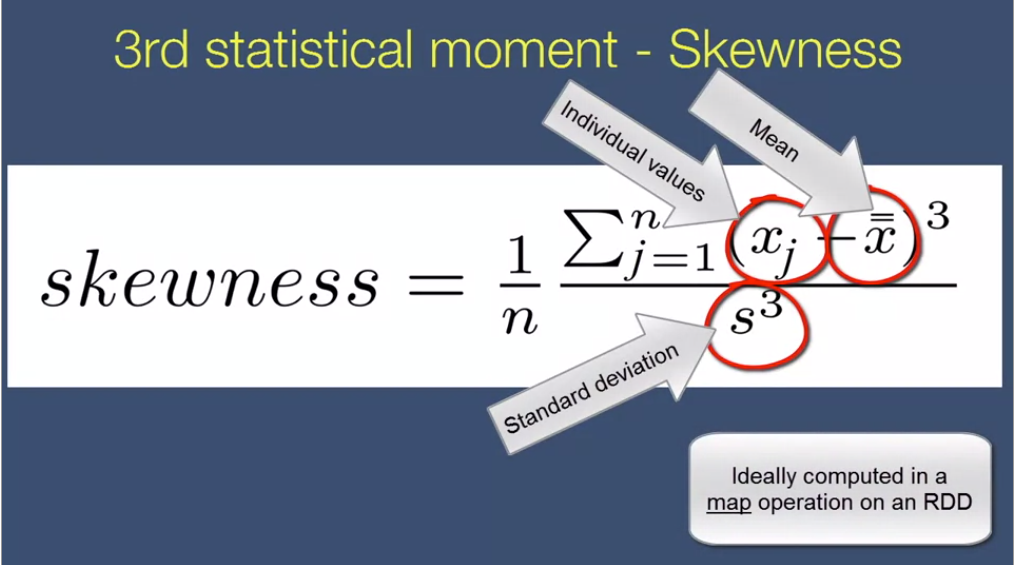

In [70]:
n = float(nm)
skewness = (1/n)*rdd.map(lambda x: pow(x-mean,3)/pow(sd,3)).sum()
print(skewness)

0.10073866041616839



 ## Kurtosis
 
 Reports the shape of the data.
 Tells us how large the outlier/tail/skew of the data is. 
 
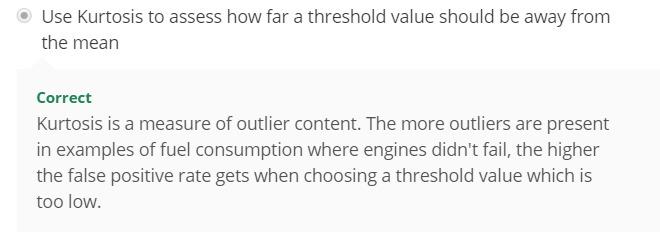

 
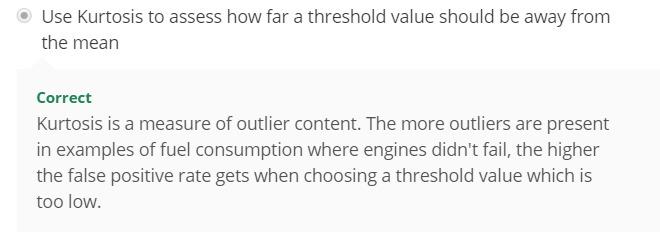


In [74]:
kurtosis = rdd.map(lambda x: pow((x-mean),4)/pow(sd,4)).sum()/n
print(kurtosis)

1.8024667236542098


## Covariance and Correlation

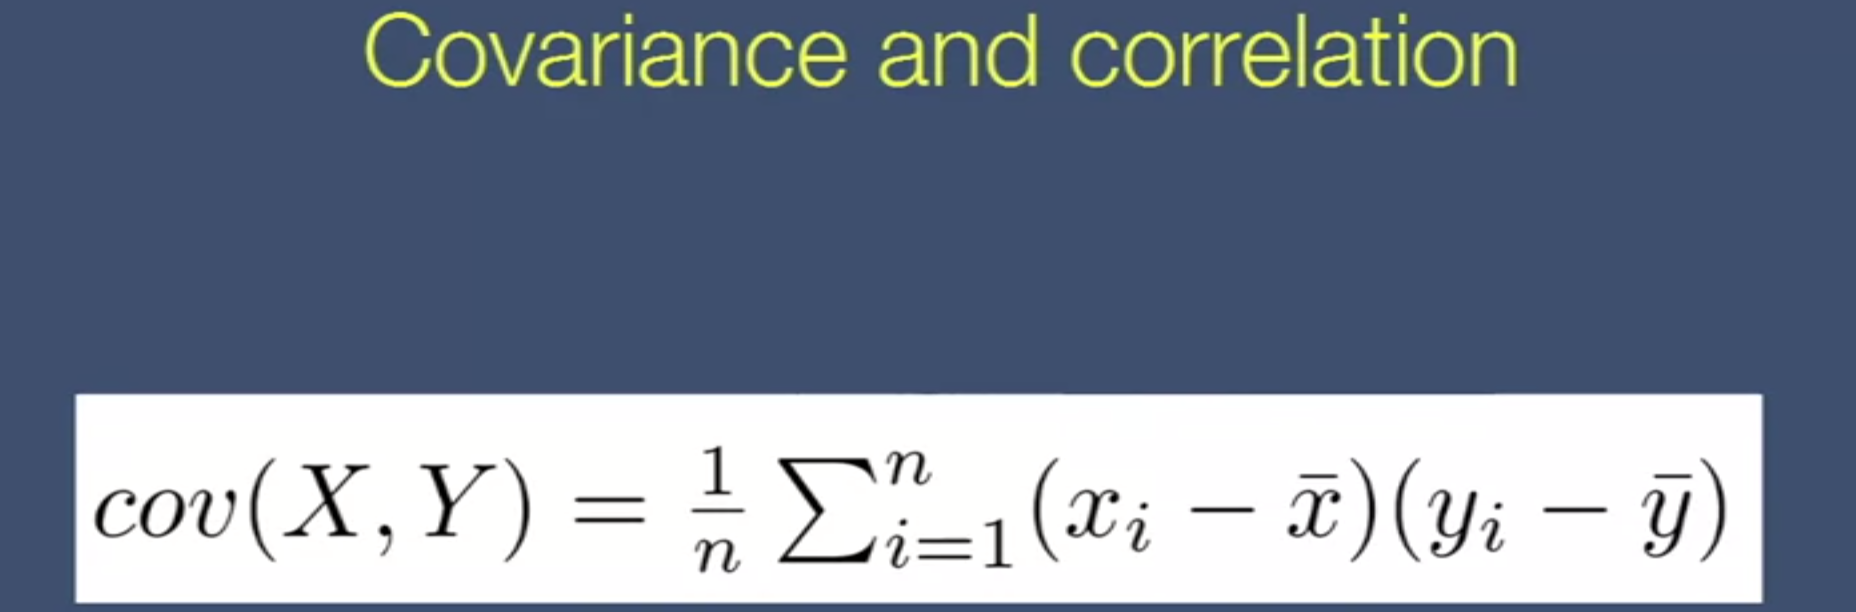


In [78]:
rddX = sc.parallelize(range(100))
rddY = sc.parallelize(range(100))

In [79]:
meanX = rddX.sum()/rddX.count()
meanY = rddY.sum()/rddY.count()

In [80]:
rddXY = rddX.zip(rddY)
rddXY.take(10)

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [101]:
covXY = rddXY.map(lambda x: (x[0]-meanX)*(x[1]-meanY)).sum()/rddXY.count()
print(covXY)

833.25


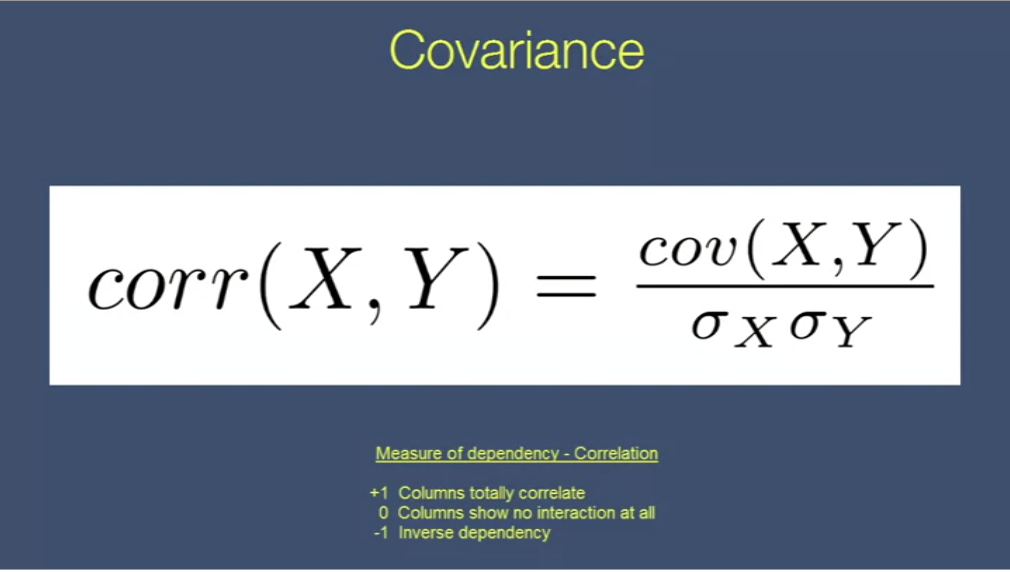

In [102]:
from math import sqrt
sdX = sqrt(rdd.map(lambda x: pow(x-meanX,2)).sum()/n)
sdY = sqrt(rdd.map(lambda x: pow(x-meanY,2)).sum()/n)

print(sdX)
print(sdY)

28.86607004772212
28.86607004772212


In [104]:
corrXY = covXY / (sdX*sdY)
print(corrXY)

1.0




## Correlation Matrix

Covariance explains interactions between columns. 
Covariance and correlation basically is the same covariance matrix shows all columns interactions. 


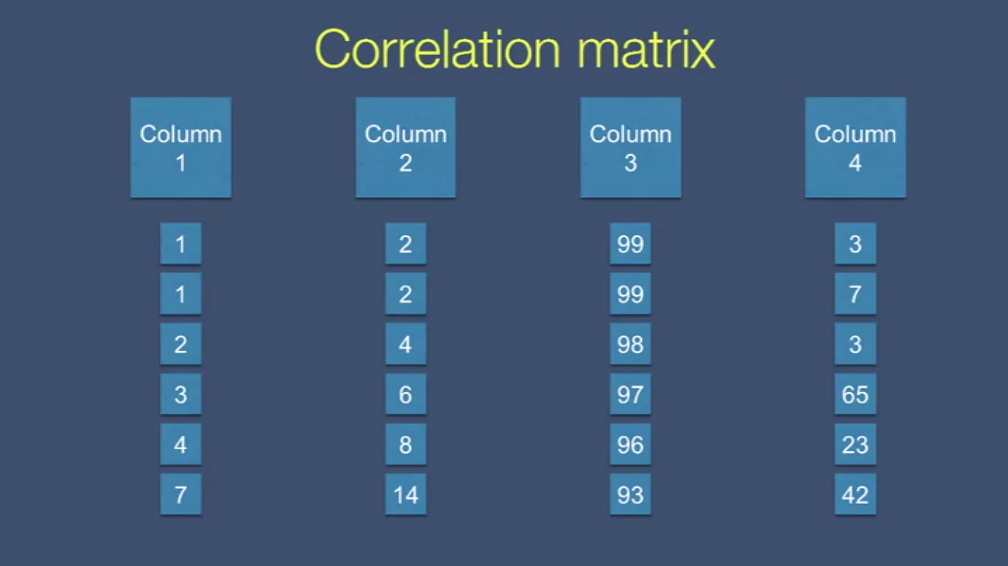

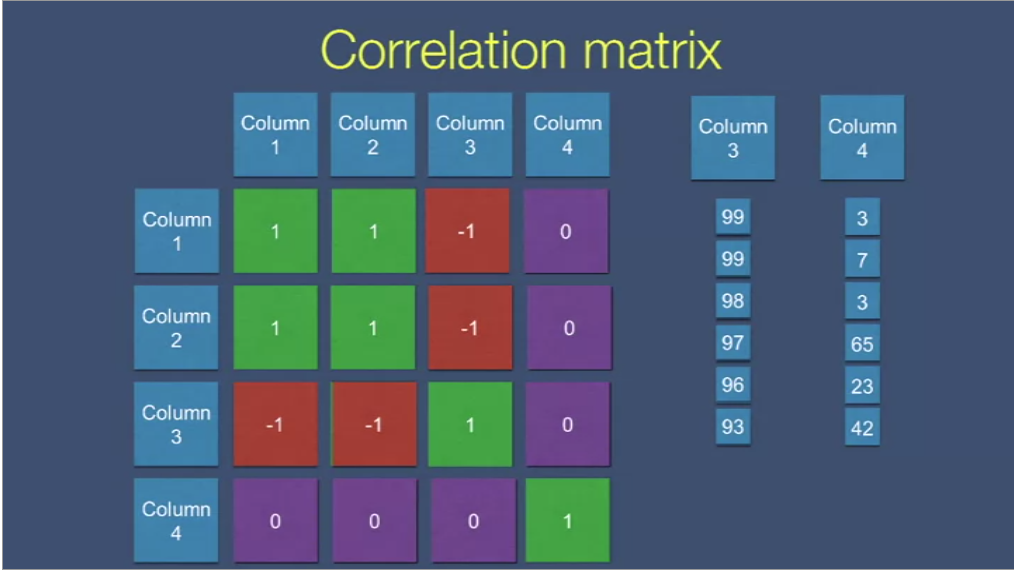

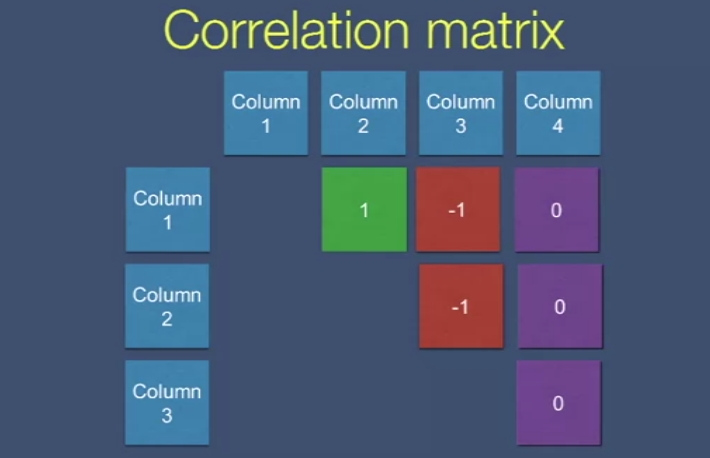

In [112]:
import random
from pyspark.mllib.stat import Statistics
col1 = sc.parallelize(range(100))
col2 = sc.parallelize(range(100,200))
col3 = sc.parallelize(list(reversed(range(100))))
col4 = sc.parallelize(random.sample(range(100),100))

data = col1.zip(col2).zip(col3).zip(col4).map(lambda x: [x[0][0][0],x[0][0][1],x[0][1],x[1]])
Statistics.corr(data)

array([[ 1.        ,  1.        , -1.        ,  0.07668767],
       [ 1.        ,  1.        , -1.        ,  0.07668767],
       [-1.        , -1.        ,  1.        , -0.07668767],
       [ 0.07668767,  0.07668767, -0.07668767,  1.        ]])